In [1]:
# conda: xesmfTools
# Example: https://xesmf.readthedocs.io/en/latest/notebooks/Curvilinear_grid.html

In [2]:
import os, sys
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl

import xarray as xr
import xesmf as xe

In [3]:
# Example

# Need to do this only once
#xr.tutorial.load_dataset('rasm')

ds = xr.tutorial.open_dataset('rasm')

ds = ds.rename({'xc': 'lon', 'yc': 'lat'})
dr = ds['Tair']

ds_out = xe.util.grid_global(5, 4)

# Dimensions are automatically dropped when all related variables are dropped.
ds_out = ds_out.drop('lat_b')
ds_out = ds_out.drop('lon_b')

regridder = xe.Regridder(ds, ds_out, 'bilinear')
dr_out = regridder(dr)


/home/cermak/miniconda3/envs/xesmfTools/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


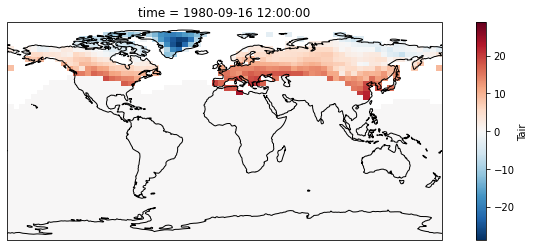

In [4]:
# Plot the regrid
plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.PlateCarree())
dr_out[0].plot.pcolormesh(ax=ax, x='lon', y='lat');
ax.coastlines();

In [5]:
ds_out

<xarray.Dataset>
Dimensions:  (x: 72, y: 45)
Coordinates:
    lon      (y, x) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
    lat      (y, x) float64 -88.0 -88.0 -88.0 -88.0 ... 88.0 88.0 88.0 88.0
Dimensions without coordinates: x, y
Data variables:
    *empty*